# 네번째 시도

Key Attempts:
- 감독, 배급사, 배우, 장르, 개봉월은 각 레이블의 관객수 평균값으로 치환
- 국가는 0,1 레이블 인코딩
- 감독, 배급사, 배우, 장르, 개봉월, 상영시간 normalise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/join_final_v5.csv', encoding='utf-8-sig', thousands=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   runTm        6806 non-null   int64 
 1   nation       6806 non-null   int64 
 2   genre        6806 non-null   int64 
 3   director     6806 non-null   object
 4   actor        6806 non-null   object
 5   is_adult     6806 non-null   int64 
 6   distributor  6806 non-null   object
 7   view         6806 non-null   int64 
 8   openMonth    6806 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 478.7+ KB


## 1. 평균 값 치환

In [4]:
# 감독, 배우, 배급사 각각의 평균 값 테이블 만들기
director = df.groupby('director').agg({"view":"mean"}).reset_index()
actor = df.groupby('actor').agg({"view":"mean"}).reset_index()
distributor = df.groupby('distributor').agg({"view":"mean"}).reset_index()
month = df.groupby('openMonth').agg({"view":"mean"}).reset_index()
genre = df.groupby('genre').agg({"view":"mean"}).reset_index()

In [5]:
for idx, row in df.iterrows():
    act = row['actor']
    dist = row['distributor']
    dir = row['director']
    m = row['openMonth']
    g = row['genre']

    a_val = actor[actor['actor'] == act]['view'].values[0]
    df.loc[idx, 'actor'] = a_val

    dist_val = distributor[distributor['distributor'] == dist]['view'].values[0]
    df.loc[idx, 'distributor'] = dist_val

    dir_val = director[director['director'] == dir]['view'].values[0]
    df.loc[idx, 'director'] = dir_val

    m_val = month[month['openMonth'] == m]['view'].values[0]
    df.loc[idx, 'openMonth'] = m_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    df.loc[idx, 'genre'] = g_val

In [6]:
df.head()

,runTm,nation,genre,director,actor,is_adult,distributor,view,openMonth
0,136,2,347162.440556,1307109.25,1412308.785714,0,1088485.983784,1865469,740111.463320
1,119,3,996311.981191,7290.4,17258.0,0,17985.852941,24634,516172.288462
2,116,1,373635.972081,7678650.2,3846923.466667,1,1650243.296117,943241,338627.196891
3,125,2,347162.440556,842257.9,402432.5,0,40571.71123,85594,253381.393617
4,105,1,425269.812587,193554.0,193554.0,0,908892.064897,193554,428123.391892


## 2. 관객 수 범주형 변환

In [7]:
for idx, row in df.iterrows():
    val = row['view']
    if val <10000:
        df.loc[idx, 'view'] = 1
    elif val <100000:
        df.loc[idx, 'view'] = 2
    elif val <500000:
        df.loc[idx, 'view'] = 3
    elif val <1000000:
        df.loc[idx, 'view'] = 4
    elif val <3000000:
        df.loc[idx, 'view'] = 5
    elif val <7000000:
        df.loc[idx, 'view'] = 6
    elif val <10000000:
        df.loc[idx, 'view'] = 7
    else:
        df.loc[idx, 'view'] = 8

## 3. 라벨인코딩

In [8]:
y = df['view']
X = df.drop('view', axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   int64  
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   float64
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   int64  
 6   distributor  6806 non-null   object 
 7   openMonth    6806 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 425.5+ KB


In [10]:
X = pd.get_dummies(data = X, columns=['nation'], prefix='region')

In [11]:
X.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'openMonth', 'region_1', 'region_2', 'region_3'],
      dtype='object')

## 4. 데이터 스플릿

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## 5. Normalise

In [13]:
X_train

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
1281,90,373635.972081,126547.5,1081503.333333,0,792229.989011,335885.026016,0,1,0
4639,107,347162.440556,176539.0,104424.5,0,618260.955157,253381.393617,0,1,0
6479,90,996311.981191,5980.0,5980.0,0,14858.6,740111.463320,1,0,0
6337,101,347162.440556,7333.0,8193.0,0,6329.636364,740111.463320,0,0,1
87,125,256486.170732,180377.0,616776.5,1,1347279.324649,489536.979452,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4560,87,347162.440556,5212.0,4159.0,0,8626.05,428123.391892,0,0,1
2503,110,267601.451193,459518.428571,277540.4,0,1347279.324649,740111.463320,0,0,1
2723,93,996311.981191,84743.6,62954.0,0,106105.608247,625724.097222,0,0,1
5822,96,347162.440556,39867.333333,5920.0,0,79213.526316,405130.969231,0,0,1


In [14]:
# train data의 runTm 컬럼만 normalisation fit 적용
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train.iloc[:,0:7] = mm.fit_transform(X_train.iloc[:, 0:7])

In [15]:
X_train

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
1281,0.213636,0.339595,0.011115,0.104882,0.0,0.229713,0.169506,0,1,0
4639,0.290909,0.311517,0.015541,0.010039,0.0,0.179206,0.000000,0,1,0
6479,0.213636,1.000000,0.000441,0.000483,0.0,0.004023,1.000000,1,0,0
6337,0.263636,0.311517,0.000561,0.000698,0.0,0.001547,1.000000,0,0,1
87,0.372727,0.215346,0.015881,0.059772,1.0,0.390857,0.485188,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4560,0.200000,0.311517,0.000373,0.000307,0.0,0.002214,0.359012,0,0,1
2503,0.304545,0.227135,0.040594,0.026843,0.0,0.390857,1.000000,0,0,1
2723,0.227273,1.000000,0.007414,0.006014,0.0,0.030515,0.764988,0,0,1
5822,0.240909,0.311517,0.003441,0.000478,0.0,0.022707,0.311774,0,0,1


In [16]:
# test 데이터의 runTm 컬럼도 같은 minMax scaler transform
X_test.iloc[:,0:7] = mm.transform(X_test.iloc[:, 0:7])

## 6. Modelling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_train = lr_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lr_train))
print("test accuracy : ", accuracy_score(y_test, lr_pred))

train accuracy :  0.46557514693534846
test accuracy :  0.4593535749265426


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=8)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_train = dt_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, dt_train))
print("test accuracy : ", accuracy_score(y_test, dt_pred))

train accuracy :  0.8087741393786734
test accuracy :  0.7394711067580804


Feature: runTm, Score: 0.01476
Feature: genre, Score: 0.00557
Feature: director, Score: 0.69469
Feature: actor, Score: 0.24139
Feature: is_adult, Score: 0.00189
Feature: distributor, Score: 0.03106
Feature: openMonth, Score: 0.00816
Feature: region_1, Score: 0.00095
Feature: region_2, Score: 0.00044
Feature: region_3, Score: 0.00109


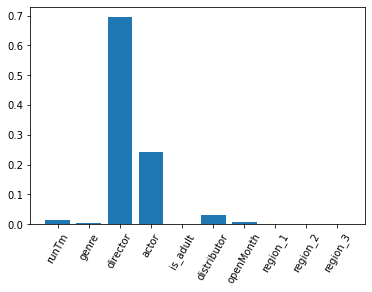

In [19]:
importance = dt_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, rf_train))
print("test accuracy : ", accuracy_score(y_test, rf_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7487757100881489


Feature: runTm, Score: 0.08754
Feature: genre, Score: 0.04195
Feature: director, Score: 0.36158
Feature: actor, Score: 0.27820
Feature: is_adult, Score: 0.01194
Feature: distributor, Score: 0.13417
Feature: openMonth, Score: 0.05651
Feature: region_1, Score: 0.00815
Feature: region_2, Score: 0.00849
Feature: region_3, Score: 0.01146


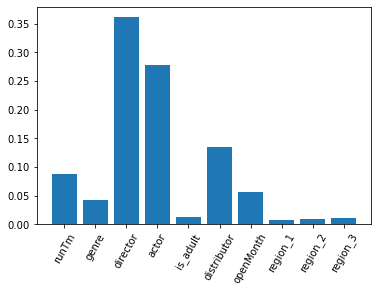

In [21]:
importance = rf_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lgbm_train))
print("test accuracy : ", accuracy_score(y_test, lgbm_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7335945151811949


Feature: runTm, Score: 35163.00000
Feature: genre, Score: 12025.00000
Feature: director, Score: 39399.00000
Feature: actor, Score: 41929.00000
Feature: is_adult, Score: 2197.00000
Feature: distributor, Score: 25734.00000
Feature: openMonth, Score: 18282.00000
Feature: region_1, Score: 2007.00000
Feature: region_2, Score: 2316.00000
Feature: region_3, Score: 1650.00000


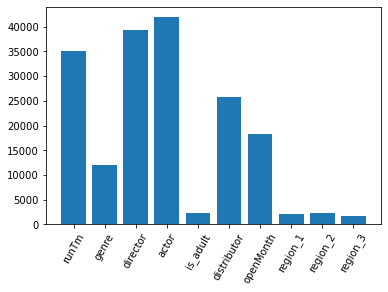

In [23]:
importance = lgbm_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

## 7. Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [36]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13, n_estimators=200, learning_rate=0.01, max_depth=4)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_train_pd = gb_clf.predict(X_train)

print("ACC : ", accuracy_score(y_test, gb_pred))
print("Fit time : ", time.time() - start_time)

ACC :  0.7546523016650343
Fit time :  17.935750722885132


In [37]:
print("Train Accuracy : ", accuracy_score(y_train, gb_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, gb_pred))

Train Accuracy :  0.8184298908480269
Test Accuracy :  0.7546523016650343


In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.01, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
grid_train_pd = grid.predict(X_train)

print("ACC : ", accuracy_score(y_test, grid_pred))
print("Fit time : ", time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
ACC :  0.7561214495592556
Fit time :  54.56214904785156


In [28]:
print("Train Accuracy : ", accuracy_score(y_train, grid_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, grid_pred))

Train Accuracy :  0.8331234256926953
Test Accuracy :  0.7561214495592556


In [29]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy -= 1
y_test_copy -= 1

In [34]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4)
xgb.fit(X_train.values, y_train_copy.values)

print("Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7526934378060725
Fit time :  2.89638090133667


In [35]:
print("Train Accuracy : ", accuracy_score(y_train_copy.values, xgb.predict(X_train.values)))
print("Test Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))

Train Accuracy :  0.7837951301427372
Test Accuracy :  0.7526934378060725


In [32]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier(n_estimators=100, base_estimator= dt_clf ,learning_rate=0.1)
abc.fit(X_train.values, y_train.values)
abc_pred = abc.predict(X_test)
abc_train_pd = abc.predict(X_train)

print("Accuracy : ", accuracy_score(y_test.values, abc_pred))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7159647404505387
Fit time :  2.4440948963165283


In [33]:
print("Train Accuracy : ", accuracy_score(y_train, abc_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, abc_pred))

Train Accuracy :  0.9540302267002518
Test Accuracy :  0.7159647404505387


---

## 8. Conclusion

- 세번째 시도에서 중앙값 치환으로 진행했다면, 이번 시도는 평균값으로 진행하였는데, 전체적으로 중앙 값 치환이 더 적합한 형상을 보인다.

---

### 9. 라벨별 예측율

In [ ]:
movie_raw = pd.read_csv('./data/join_v2.csv', encoding='utf-8-sig', thousands=',')

xgb_train = xgb.predict(X_train.values)
xgb_test = xgb.predict(X_test.values)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train_copy['view_cat'] = y_train
X_test_copy['view_cat'] = y_test

xgb_train_1 = xgb_train + 1
xgb_test_1 = xgb_test + 1

X_train_copy['xgb_pred'] = xgb_train_1
X_test_copy['xgb_pred'] = xgb_test_1

pred_df = pd.concat([X_train_copy, X_test_copy])
new = pd.merge(movie_raw, pred_df, left_index=True, right_index=True)

In [ ]:
new.columns

In [ ]:
new = new.drop(['region_1', 'region_2', 'region_3', 'is_adult_y'], axis=1)

In [ ]:
new['correct'] = 0.

for idx, row in new.iterrows():
    if row['view_cat'] == row['xgb_pred']:
        new.loc[idx, 'correct'] = 1.

In [ ]:
view_cat = new.groupby(['view_cat']).agg({"correct":"sum", "movieCd":"count"}).reset_index()
view_cat['acc_rate'] = view_cat['correct']/view_cat['movieCd']
view_cat